In [1]:
from w1ot.jax_implementation.ot import w1ot
from w1ot.data import make_2d_data, plot_2d_data

In [2]:
import jax
jax.config.update('jax_platform_name', 'cpu')
print(jax.devices())

[CpuDevice(id=0)]


In [3]:
# import jax.numpy as jnp
# import jax.random as random
# from flax import linen as nn
#
# def cayley(W):
#     if W.ndim == 2:
#         return cayley(W[None])[0]
#     _, cout, cin = W.shape
#     if cin > cout:
#         return jnp.swapaxes(cayley(jnp.swapaxes(W, 1, 2)), 1, 2)
#     U, V = W[:, :cin], W[:, cin:]
#
#     I = jnp.eye(cin)[None, :, :]
#     A = U - jnp.conj(U).swapaxes(1, 2) + jnp.conj(V).swapaxes(1, 2) @ V
#
#     iIpA = jnp.linalg.inv(I + A)
#     result = jnp.concatenate((iIpA @ (I - A), -2 * V @ iIpA), axis=1)
#
#     return result
#
# class LBlayer(nn.Module):
#     in_features: int
#     out_features: int
#     scale: float = 1.0
#     activation: str = 'relu'
#
#     def setup(self):
#         self.weight = self.param('weight', nn.initializers.he_normal(), (self.out_features, self.out_features + self.in_features))
#         initial_weight_norm = jnp.linalg.norm(self.weight)
#         self.alpha = self.param('alpha', lambda rng, shape: jnp.ones(shape, dtype=jnp.float32) * initial_weight_norm, (1,))
#         self.psi = self.param('psi', nn.initializers.zeros, (self.out_features,))
#         self.bias = self.param('bias', nn.initializers.zeros, (self.out_features,))
#
#         if self.activation == 'relu':
#             self.activation_fn = nn.relu
#         elif self.activation == 'celu':
#             self.activation_fn = nn.celu
#         elif self.activation == 'id':
#             self.activation_fn = lambda x: x  # Identity function
#         else:
#             raise ValueError("Activation must be 'relu', 'celu', or 'id'")
#
#     @nn.compact
#     def __call__(self, x):
#         fout = self.out_features
#         Q = cayley(self.alpha * self.weight / jnp.linalg.norm(self.weight))
#         x = jnp.dot(self.scale * x, Q[:, fout:].T)  # B * h
#
#         if self.psi is not None:
#             x = x * jnp.exp(-self.psi) * (2 ** 0.5)  # sqrt(2) * Psi^{-1} * B * h
#
#         x += self.bias
#         x = self.activation_fn(x) * jnp.exp(self.psi)  # Psi * z
#         x = (2 ** 0.5) * jnp.dot(x, Q[:, :fout])  # sqrt(2) * A^top * Psi * z
#
#         return x
#
#
# def test_lipschitz_lblayer():
#     num_samples = 100000
#     epsilon = 1e-5
#     rng = random.PRNGKey(1)
#
#     # Initialize the LBlayer
#     in_features = 10
#     out_features = 5
#     scale = 100.0
#     activation = 'relu'
#
#     model = LBlayer(in_features=in_features, out_features=out_features, scale=scale, activation=activation)
#
#     x1 = random.normal(rng, (num_samples, in_features))
#     x2 = x1 + epsilon * random.normal(rng, (num_samples, in_features))
#
#     params = model.init(rng, x1)
#     y1 = model.apply(params, x1)
#     y2 = model.apply(params, x2)
#
#     input_distances_x = jnp.linalg.norm(x1 - x2, axis=1)
#     output_distances_x = jnp.linalg.norm(y1 - y2, axis=1)
#     lipschitz_constants_x = output_distances_x / input_distances_x
#
#     max_lipschitz_x = lipschitz_constants_x.max()
#     is_1_lipschitz_x = max_lipschitz_x <= scale
#
#     # Check Lipschitz continuity w.r.t the internal transformation
#     # For simplicity, assuming that changes to internal parameters would
#     # have similar effects as perturbations to the input features.
#     # (This part is model-specific and might require more intricate design
#     # depending on the nature of the internal transformation and layers.)
#
#     print(f"Max Lipschitz constant w.r.t. x: {max_lipschitz_x}")
#     print(f"Is 1-Lipschitz w.r.t. x: {is_1_lipschitz_x}")
#
#     # Note: Similar steps can be followed to check w.r.t y (if y is a feature).
#
#     return is_1_lipschitz_x
#
# # Run the test
# test_lipschitz_lblayer()


In [4]:
source, target = make_2d_data(dataset='moons', n_samples=20000, noise=0.01)
model = w1ot(source, target, 0.)
model.maximize_potential(batch_size=100, num_epochs=1000, lr=1e-3, alpha=1e-4, optimizer='adam')
model.plot_2dpotential()
model.fit_distance_function(batch_size=2000, num_epochs=3, lr=1e-4, alpha=1e-4, optimizer='rmsprop')

the optimizer is:  adam
{'layer_0': {'alpha': (1,), 'bias': (32,), 'psi': (32,), 'weight': (32, 34)}, 'layer_1': {'alpha': (1,), 'bias': (32,), 'psi': (32,), 'weight': (32, 64)}, 'layer_2': {'alpha': (1,), 'bias': (32,), 'psi': (32,), 'weight': (32, 64)}, 'layer_3': {'alpha': (1,), 'bias': (32,), 'psi': (32,), 'weight': (32, 64)}, 'layer_4': {'alpha': (1,), 'bias': (32,), 'psi': (32,), 'weight': (32, 64)}, 'output_layer': {'alpha': (1,), 'bias': (1,), 'weight': (1, 33)}}
Epoch 0: Train Loss: -0.1696, Val Loss: -0.1696, LR: 0.001000, Grad Norm: 0.1308, Source Phi: 0.0173, Target Phi: -0.1523
Epoch 1: Train Loss: -0.2657, Val Loss: -0.2657, LR: 0.001000, Grad Norm: 0.0797, Source Phi: 0.0150, Target Phi: -0.2508
Epoch 2: Train Loss: -0.2841, Val Loss: -0.2841, LR: 0.001000, Grad Norm: 0.0508, Source Phi: -0.0036, Target Phi: -0.2878
Epoch 3: Train Loss: -0.2905, Val Loss: -0.2905, LR: 0.001000, Grad Norm: 0.0455, Source Phi: -0.0125, Target Phi: -0.3030
Epoch 4: Train Loss: -0.2964, Val 

KeyboardInterrupt: 

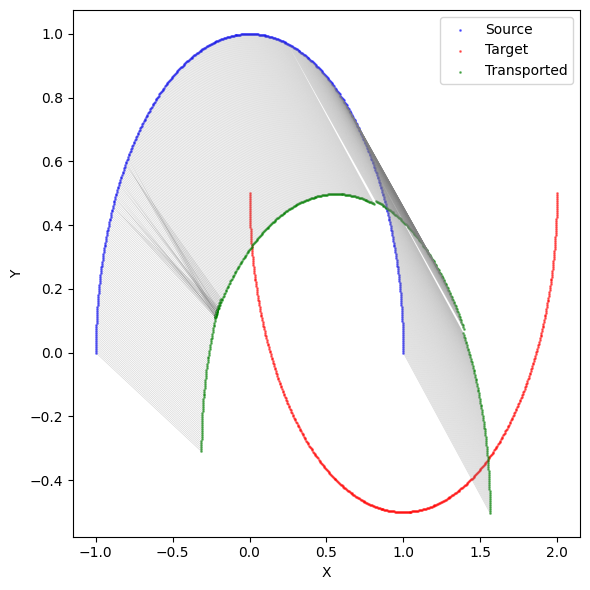

In [6]:
source, target = make_2d_data(dataset='moons', n_samples=1000, noise=0.)
transported = model.transport(source, method='grad_guidance')
plot_2d_data(source, target, transported)

In [1]:
from w1ot.jax_implementation.layers import cayley
from w1ot.jax_implementation.layers import LBlinear, LBlayer
import jax
import jax.numpy as jnp
jax.config.update('jax_platform_name', 'cpu')
print(jax.devices())

[CpuDevice(id=0)]


In [2]:

def test_cayley():
    W = jnp.array([[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
    Q = cayley(W)
    print("Cayley output shape:", Q.shape)
    print("Cayley output:\n", Q)

    # Check if Q is orthogonal (for each 2D slice)
    Q_2d = Q[0]  # Take the first (and only) 2D slice
    QTQ = jnp.matmul(Q_2d.T, Q_2d)
    print("Q^T Q:\n", QTQ)
    print("Is Q orthogonal?", jnp.allclose(QTQ, jnp.eye(Q_2d.shape[1]), atol=1e-6))

    # Additional check: Q should satisfy Q^T Q = Q Q^T = I
    QQT = jnp.matmul(Q_2d, Q_2d.T)
    print("Q Q^T:\n", QQT)
    print("Is Q Q^T close to identity?", jnp.allclose(QQT, jnp.eye(Q_2d.shape[0]), atol=1e-6))
test_cayley()

Cayley output shape: (1, 3, 3)
Cayley output:
 [[[-0.59999996 -0.48        0.64      ]
  [-0.79999995  0.36       -0.48000002]
  [ 0.         -0.8        -0.6       ]]]
Q^T Q:
 [[ 9.9999988e-01 -6.6757195e-09  1.8835067e-08]
 [-6.6757195e-09  1.0000000e+00  3.6954880e-08]
 [ 1.8835067e-08  3.6954880e-08  1.0000000e+00]]
Is Q orthogonal? True
Q Q^T:
 [[ 9.9999988e-01 -8.0156326e-08 -3.3378598e-09]
 [-8.0156326e-08  9.9999994e-01  5.4836278e-09]
 [-3.3378598e-09  5.4836278e-09  1.0000001e+00]]
Is Q Q^T close to identity? True


In [9]:
def test_LBlinear():
    key = jax.random.PRNGKey(0)
    layer = LBlinear(in_features=3, out_features=2)
    x = jax.random.normal(key, (4, 3))  # Batch of 4, 3-dimensional inputs
    params = layer.init(key, x)
    y = layer.apply(params, x)
    print("LBlinear input shape:", x.shape)
    print("LBlinear output shape:", y.shape)
    print("LBlinear output:\n", y)

    # Check if the output changes with different inputs
    x2 = jax.random.normal(key, (4, 3))
    y2 = layer.apply(params, x2)
    print("Output different for different inputs?", jnp.any(y != y2))

def test_LBlayer():
    key = jax.random.PRNGKey(0)
    layer = LBlayer(in_features=3, out_features=2)
    x = jax.random.normal(key, (4, 3))  # Batch of 4, 3-dimensional inputs
    params = layer.init(key, x)
    y = layer.apply(params, x)
    print("LBlayer input shape:", x.shape)
    print("LBlayer output shape:", y.shape)

    key = jax.random.PRNGKey(1)
    # Check if the output changes with different inputs
    x2 = jax.random.normal(key, (4, 3))
    print(x, x2)
    y2 = layer.apply(params, x2)
    print(y, y2)
    print("Output different for different inputs?", ~jnp.allclose(y, y2))
test_LBlayer()

LBlayer input shape: (4, 3)
LBlayer output shape: (4, 2)
[[ 1.1901639  -1.0996888   0.44367844]
 [ 0.5984697  -0.39189556  0.69261974]
 [ 0.46018356 -2.068578   -0.21438177]
 [-0.9898306  -0.6789304   0.27362573]] [[ 0.07545026 -1.0032071  -1.1431501 ]
 [-0.14357094  0.5904228  -1.4384177 ]
 [-0.03499871  0.14507416  0.23655683]
 [ 1.5627991  -1.1358407   0.9167496 ]]
[[-0.43299994 -0.5537597 ]
 [-0.28087273 -0.35920557]
 [ 0.52451926 -0.8144821 ]
 [ 1.0765016  -0.470445  ]] [[ 0.32438663 -0.14176112]
 [ 0.          0.        ]
 [-0.01678739 -0.02146924]
 [-0.5846196  -0.7476646 ]]
Output different for different inputs? True


In [ ]:
def test_loss_function():
    key = jax.random.PRNGKey(0)
    model = LBNN(input_size=2, output_size=1, hidden_sizes=[32, 32])
    source = jax.random.normal(key, (100, 2))
    target = jax.random.normal(key, (100, 2)) + 1.0  # Shifted distribution
    variables = model.init(key, source)
    params = variables['params']  # Extract just the 'params' part

    @jax.jit
    def loss_fn(params, source_batch, target_batch):
        return -(model.apply({'params': params}, source_batch).mean() -
                 model.apply({'params': params}, target_batch).mean())

    loss = loss_fn(params, source, target)
    print("Initial loss:", loss)

    # Check if gradients are non-zero
    grads = jax.grad(loss_fn)(params, source, target)
    grad_norm = jax.tree_util.tree_reduce(lambda x, y: x + jnp.sum(y**2), grads, 0)
    grad_norm = jnp.sqrt(grad_norm)
    print("Gradient norm:", grad_norm)
test_loss_function()

In [ ]:
def test_LBNN():
    key = jax.random.PRNGKey(0)
    model = LBNN(input_size=2, output_size=1, hidden_sizes=[32, 32])
    x = jax.random.normal(key, (4, 2))
    variables = model.init(key, x)
    y = model.apply(variables, x)
    print("LBNN input shape:", x.shape)
    print("LBNN output shape:", y.shape)
    print("LBNN input:\n", x)
    print("LBNN output:\n", y)

    # Check if the output changes with different inputs
    key, subkey = jax.random.split(key)
    x2 = jax.random.normal(subkey, (4, 2))
    y2 = model.apply(variables, x2)
    print("Second LBNN input:\n", x2)
    print("Second LBNN output:\n", y2)
    print("Output different for different inputs?", jnp.any(y != y2))
test_LBNN()

In [ ]:
def train_model(model, source_data, target_data, num_epochs=1000, batch_size=32, learning_rate=1e-3):
    key = jax.random.PRNGKey(0)
    params = model.init(key, jnp.zeros((1, model.input_size)))['params']

    optimizer = optax.adam(learning_rate)
    opt_state = optimizer.init(params)

    @jax.jit
    def loss_fn(params, source_batch, target_batch):
        source_output = model.apply({'params': params}, source_batch)
        target_output = model.apply({'params': params}, target_batch)
        loss = jnp.mean(source_output) - jnp.mean(target_output)
        return -loss  # We negate because we want to maximize this difference

    @jax.jit
    def compute_gradients(params, source_batch, target_batch):
        loss, grads = jax.value_and_grad(loss_fn)(params, source_batch, target_batch)
        return loss, grads

    @jax.jit
    def update_step(params, opt_state, source_batch, target_batch):
        loss, grads = compute_gradients(params, source_batch, target_batch)
        updates, opt_state = optimizer.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        return params, opt_state, loss

    for epoch in range(num_epochs):
        # Shuffle and batch the data
        key, subkey = jax.random.split(key)
        source_data = jax.random.permutation(subkey, source_data)
        target_data = jax.random.permutation(subkey, target_data)

        total_loss = 0
        num_batches = min(len(source_data), len(target_data)) // batch_size

        for i in range(num_batches):
            source_batch = source_data[i*batch_size:(i+1)*batch_size]
            target_batch = target_data[i*batch_size:(i+1)*batch_size]

            params, opt_state, loss = update_step(params, opt_state, source_batch, target_batch)
            total_loss += loss

        avg_loss = total_loss / num_batches
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Average Loss: {avg_loss}")

    return params

In [ ]:
# Assuming you have your source_data and target_data
source_data, target_data = make_2d_data(dataset='moons', n_samples=2000, noise=0.01)
model = LBNN(input_size=2, output_size=1, hidden_sizes=[32, 32])
trained_params = train_model(model, source_data, target_data)